<a href="https://colab.research.google.com/github/rennydoig/ssc22-case-comp/blob/main/Daisy_dir/Heat_Map_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import csv
!pip install geopandas rtree
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import unary_union
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pickle
import datetime
!pip install pysal contextily &> /dev/null
!pip install pandana
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
from pysal.explore import esda
from pysal.lib import weights
drive.mount('/content/drive')

In [2]:
os.chdir('/content/drive/MyDrive/2022 SSC Case Study/')
pred_d_ens = pd.read_csv('pred_download_ENS_2019_2030.csv')
pred_u_ens = pd.read_csv('pred_upload_ENS_2019_2030.csv')

# Merge with boundary data
os.chdir('/content/drive/MyDrive/2022 SSC Case Study/dataset/')
dat_path = './boundaries/statcan-census-division/statcan-census-division.shp'
boundary_dat = gpd.read_file(dat_path)
boundary_dat['CDUID'] = boundary_dat['CDUID'].astype(int)

In [3]:
colnames=list(pred_u_ens.columns)[5:53]
for col in colnames:
  s = col + '_class'
  pred_d_ens[s] = [int(p >= 50) for p in pred_d_ens[col]]
  pred_u_ens[s] = [int(p >= 10) for p in pred_u_ens[col]]

In [4]:
#pred_d_ens_fixed = pred_d_ens[pred_d_ens['conn_type']=='fixed']
#pred_d_ens_mobile = pred_d_ens[pred_d_ens['conn_type']=='mobile']
#pred_d_ens_fixed.index = range(0, pred_d_ens_fixed.shape[0])

pred_d_ens = pd.merge(pred_d_ens, boundary_dat, on='CDUID', how='left')
pred_d_ens = gpd.GeoDataFrame(pred_d_ens, geometry='geometry', crs="EPSG:4326")

pred_u_ens = pd.merge(pred_u_ens, boundary_dat, on='CDUID', how='left')
pred_u_ens = gpd.GeoDataFrame(pred_u_ens, geometry='geometry', crs="EPSG:4326")

In [5]:
display(pred_d_ens.head(4))

,PRUID_x,CDUID,SACTYPE,is_rural,conn_type,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,...,2029Q4_class,2030Q1_class,2030Q2_class,2030Q3_class,2030Q4_class,CDNAME,CDTYPE,PRUID_y,PRNAME,geometry
0,10,1001,1,False,fixed,114.332871,120.585788,122.544909,131.760907,135.698184,...,1,1,1,1,1,Division No. 1,CDR,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,"MULTIPOLYGON (((8928320.397 2199041.249, 89283..."
1,10,1001,1,False,mobile,97.801407,96.862767,101.546089,111.007782,123.188278,...,1,1,1,1,1,Division No. 1,CDR,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,"MULTIPOLYGON (((8928320.397 2199041.249, 89283..."
2,10,1001,1,True,fixed,110.125566,109.716598,112.646512,116.071595,125.815802,...,1,1,1,1,1,Division No. 1,CDR,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,"MULTIPOLYGON (((8928320.397 2199041.249, 89283..."
3,10,1001,1,True,mobile,88.573093,85.129537,100.275677,85.999942,89.973514,...,1,1,1,1,1,Division No. 1,CDR,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,"MULTIPOLYGON (((8928320.397 2199041.249, 89283..."


## Download speed 
### Fixed connection type


Text(0.5, 1.0, 'Predicted download speed (mbps) for 2030-Q1')

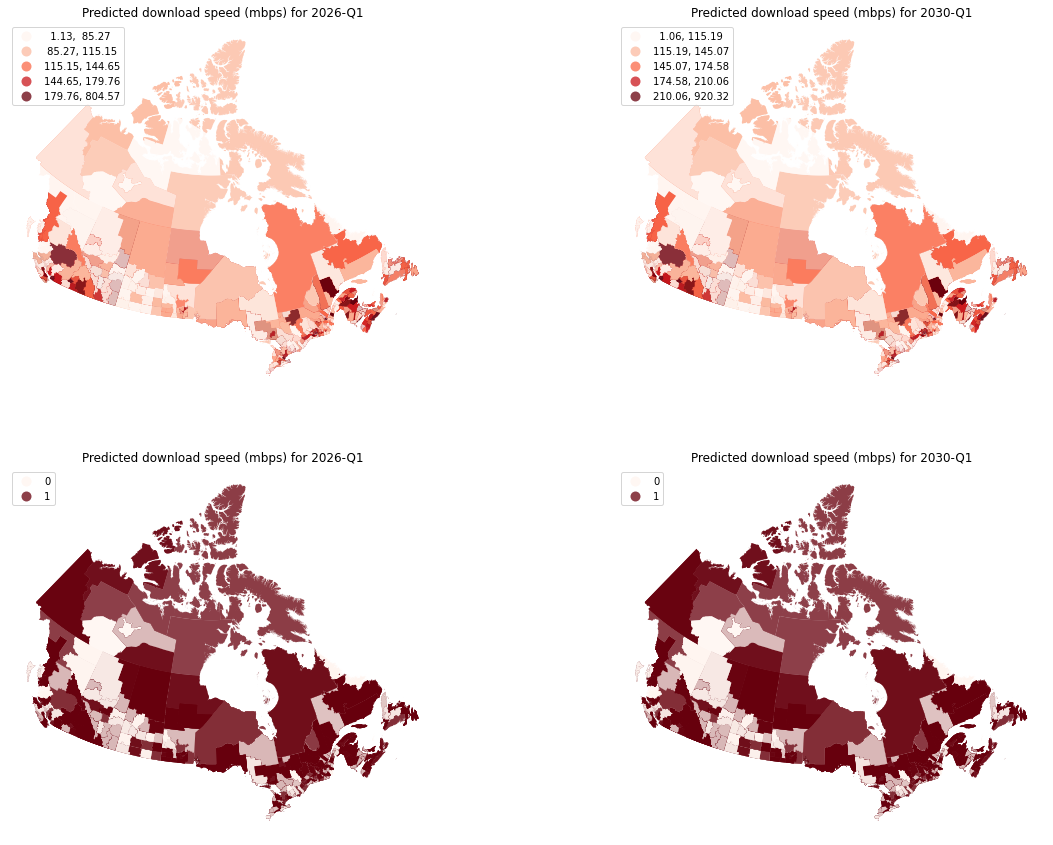

In [6]:
dat = pred_d_ens[pred_d_ens['conn_type']=='fixed']
f, axs = plt.subplots(2,2, figsize=(20,15))
[ax1, ax2], [ax3, ax4] = axs

dat.plot(column = '2026Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted download speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax1, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted download speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax2, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2026Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted download speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax3, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax4)
ax4.set_axis_off()
ax4.set_title("Predicted download speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax4, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

### Mobile connection type

Text(0.5, 1.0, 'Predicted download speed (mbps) for 2030-Q1')

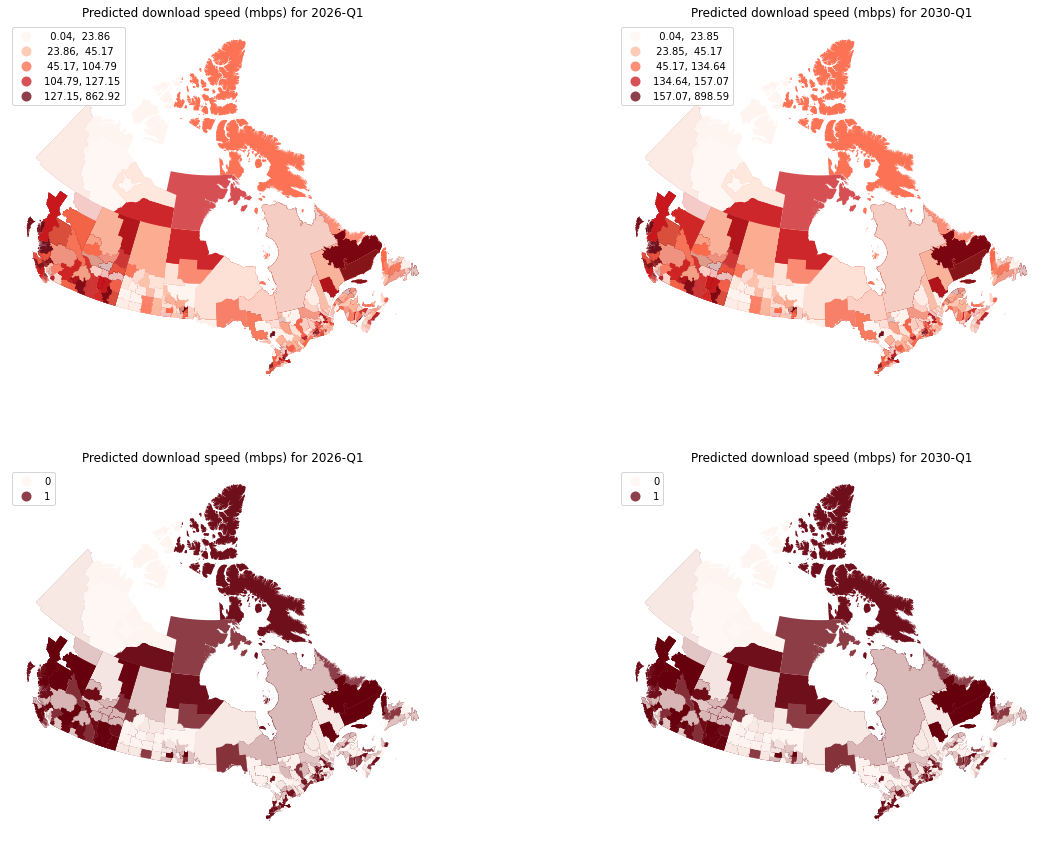

In [56]:
dat = pred_d_ens[pred_d_ens['conn_type']=='mobile']
f, axs = plt.subplots(2,2, figsize=(20,15))
[ax1, ax2], [ax3, ax4] = axs

dat.plot(column = '2026Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted download speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax1, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted download speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax2, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2026Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted download speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax3, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax4)
ax4.set_axis_off()
ax4.set_title("Predicted download speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax4, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

## Upload speed 
### Fixed connection type

Text(0.5, 1.0, 'Predicted upload speed (mbps) for 2030-Q1')

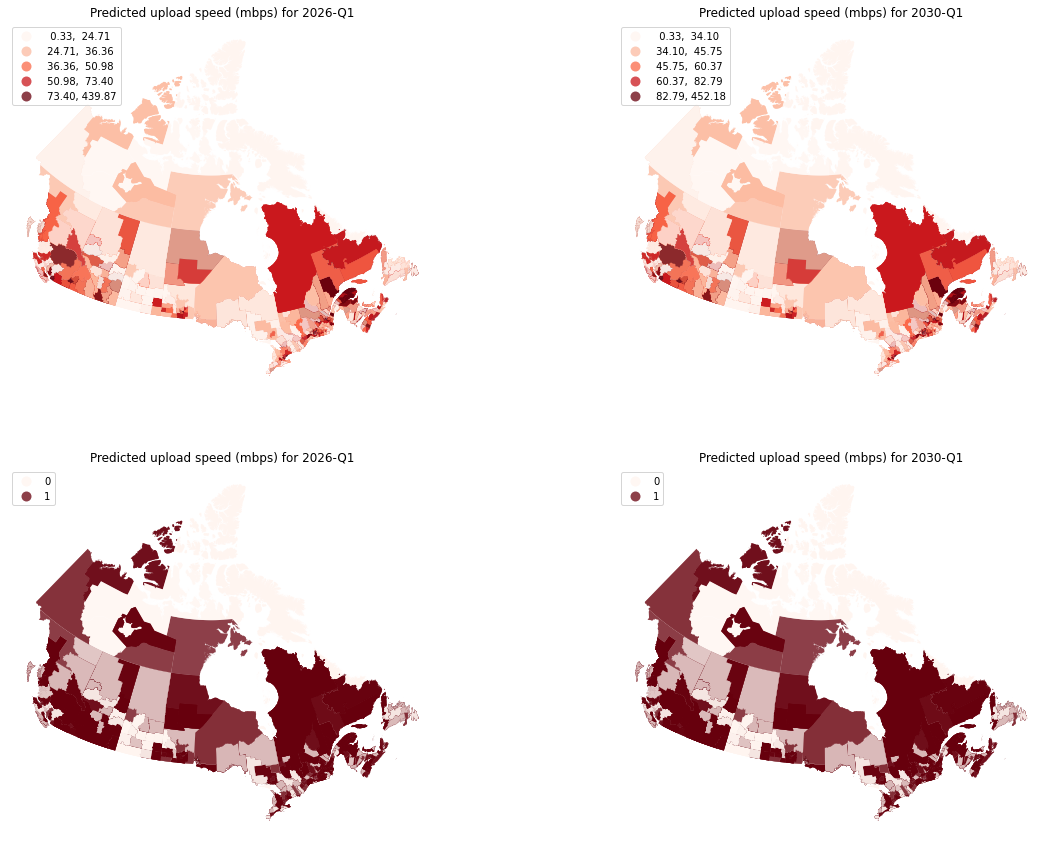

In [57]:
dat = pred_u_ens[pred_u_ens['conn_type']=='fixed']
f, axs = plt.subplots(2,2, figsize=(20,15))
[ax1, ax2], [ax3, ax4] = axs

dat.plot(column = '2026Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted upload speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax1, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted upload speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax2, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2026Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted upload speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax3, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax4)
ax4.set_axis_off()
ax4.set_title("Predicted upload speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax4, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

### Mobile connection type

In [ ]:
dat = pred_u_ens[pred_u_ens['conn_type']=='mobile']
f, axs = plt.subplots(2,2, figsize=(20,15))
[ax1, ax2], [ax3, ax4] = axs

dat.plot(column = '2026Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted upload speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax1, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1',
             cmap='Reds',
             scheme='quantiles',
             k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted upload speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax2, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2026Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted upload speed (mbps) for 2026-Q1")
#contextily.add_basemap(ax3, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)

dat.plot(column = '2030Q1_class',
             cmap='Reds',
             #scheme='quantiles',
             #k=5,
             edgecolor='white',
             linewidth=0.,
             alpha=0.75,
             legend=True,
             legend_kwds={'loc':2},
             categorical=True,
             ax=ax4)
ax4.set_axis_off()
ax4.set_title("Predicted upload speed (mbps) for 2030-Q1")
#contextily.add_basemap(ax4, crs=dat.crs, source=contextily.providers.Stamen.TerrainBackground)